#  Accumulated Local Effects (ALE) Plots for Regression

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

This notebook was created by [Sal J.M](https://www.linkedin.com/in/salim-j-m-a04534114/). Thank you so much for your contribution Sal!!

 - In this notebook, we will focus on demystifying the concept of Accumulated Local Effects (ALE) and its application in gauging the impact of features on a model in the context of a Regression problem.
 - We'll walk through the step-by-step process of calculating ALE with the ALIBI python package, shedding light on how these effects manifest across diverse model types, spanning both linear and non-linear models.
 - We will use the California Housing dataset from scikit-learn.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
from xgboost import XGBRegressor

### Load California Housing Dataset

In [4]:
# Load the california housing dataset using scikit-learn
# more info about the dataset here:
# https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
housing = fetch_california_housing(as_frame=True)

# get the feature names, will be used by the ALE explainer
feature_names = housing.feature_names

# get the data in a pandas DataFrame
data = housing.frame

# get the name of the target variable, aslo will be used by the ALE explainer
target_names = housing.target_names

# Create X (features) and y (target)
X = data.drop(target_names, axis=1)
y = data[target_names[0]]

In [7]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
target_names

['MedHouseVal']

In [8]:
data.shape

(20640, 9)

In [9]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

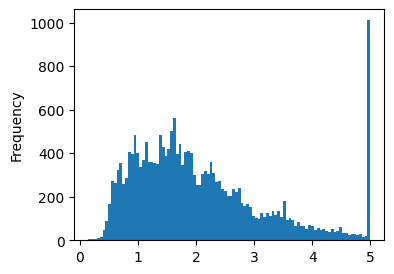

In [22]:
# plot the distribution of the target variable
plt.figure(figsize=(4,3))
y.plot.hist(bins=100);

### Split Data

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [16]:
y_train.shape, y_test.shape

((14448,), (6192,))

### Train a Linear Regression

In [17]:
lr = LinearRegression()

lr.fit(X_train.values, y_train.values)

LinearRegression()

In [19]:
# evaluate the linear model
mean_squared_error(y_test, lr.predict(X_test.values))

0.5305677824766758

#### Linear Regression Coefficients

 - We get the linear regression coefficients as they serve to validate and align with the insights derived from the ALE plots.
 - These coefficients play a crucial role in affirming the patterns and trends identified through our ALE analysis.

In [20]:
pd.Series(lr.coef_, index=X_train.columns) \
    .round(4) \
    .sort_values(ascending=False)

AveBedrms     0.7786
MedInc        0.4458
HouseAge      0.0097
Population   -0.0000
AveOccup     -0.0034
AveRooms     -0.1221
Latitude     -0.4185
Longitude    -0.4337
dtype: float64

### Train XGBOOST

 - We opt for the XGBoost regressor as our choice for the non-linear model in this analysis.

In [23]:
# create xgboost classifier
xgbr = XGBRegressor(n_estimators=90,
                    max_depth=3,
                    random_state=3,)

# train
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=90, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=3, ...)

In [25]:
# evaluate the gradient boosted model
mean_squared_error(y_test, xgbr.predict(X_test))

0.24915082404135683

#### XGBoost Feature Importance

 XGboost provides feature importance which can be used as a gloabal interpretation method


In [23]:
pd.Series(xgbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)

MedInc        0.514419
AveOccup      0.166503
Longitude     0.105532
HouseAge      0.072176
Latitude      0.066829
AveRooms      0.041629
AveBedrms     0.018243
Population    0.014670
dtype: float32

### ALE with Alibi

 - To generate the ALE plots, follow these steps:
     - Import the ALE explainer module.
     - Import the plot_ale function.
     - Create an ALE instance to compute the ALE values.
     - Utilize the plot_ale function to visualize the ALE values.

In [37]:
# import ALE and plot_ale from alibi
from alibi.explainers import ALE, plot_ale

#### ALE for the Linear Regression Model

In [38]:
# create the ALE object
    # which take a model prediction function
    # the feature names
    # and the target names

# linear regression prediction function
prediction_fn_lr = lr.predict

ale_lr = ALE(
    predictor=prediction_fn_lr, # specify the prediction function of the trained model here
    feature_names=feature_names, # specify the names of the features of intereset here
    target_names=target_names, # specify the target names here
)

# compute the ALE values by calling the explain function of the ALE object
# the explain function expects a numpy array
exp_lr = ale_lr.explain(X_test.values)

In [76]:
# the results of the ALE calculations are now all stored in the explanation object
# The explanation objects contain the ALE values for each feature, accessible through the ale_values attribute.
# This attribute is a list of NumPy arrays, with one array designated for each feature.
exp_lr

Explanation(meta={
  'name': 'ALE',
  'type': ['blackbox'],
  'explanations': ['global'],
  'params': {
              'check_feature_resolution': True,
              'low_resolution_threshold': 10,
              'extrapolate_constant': True,
              'extrapolate_constant_perc': 10.0,
              'extrapolate_constant_min': 0.1,
              'min_bin_points': 4}
            ,
  'version': '0.9.4'}
, data={
  'ale_values': [array([[-1.49567774e+00],
       [-1.35424761e+00],
       [-1.30469864e+00],
       [-1.27272187e+00],
       [-1.23184927e+00],
       [-1.20728088e+00],
       [-1.18308804e+00],
       [-1.16686159e+00],
       [-1.14731199e+00],
       [-1.12679482e+00],
       [-1.11553555e+00],
       [-1.09907732e+00],
       [-1.09091370e+00],
       [-1.07163228e+00],
       [-1.06268899e+00],
       [-1.05602135e+00],
       [-1.04446924e+00],
       [-1.03079355e+00],
       [-1.02160661e+00],
       [-1.01096113e+00],
       [-9.99671680e-01],
       [-9.94082770

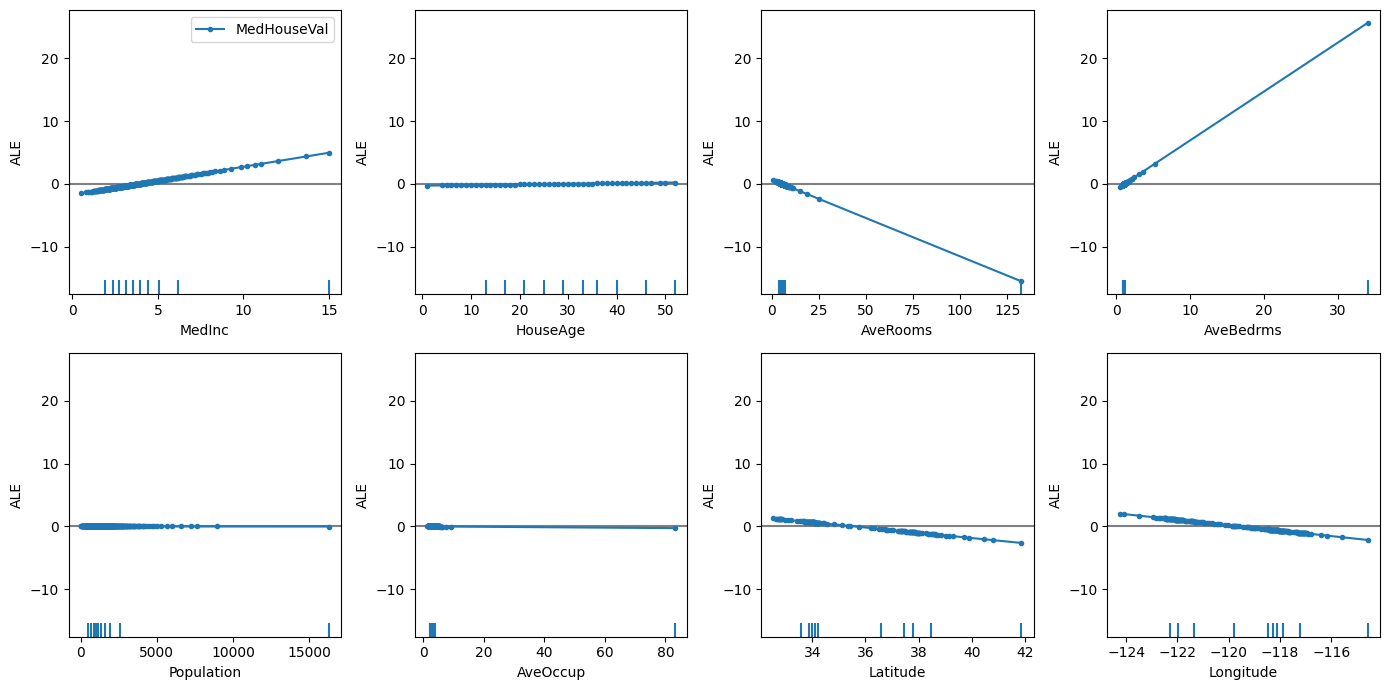

In [47]:
# now, we can provide the explanation results to the plot_ale function
# we can also specify the number of columns and control some figure parameters
plot_ale(exp_lr, n_cols=4, fig_kw={'figwidth': 14, 'figheight': 7});

 - The plot function generates multiple subplots, each corresponding to a distinct feature. In this instance, we inputted eight features into the explain function, representing all the features in X_test.

 - On the X-axis, feature values are depicted, while the Y-axis portrays ALE values measured in the same units as the target variable, Median House Value.

 - All subplots are centered around 0, a characteristic of ALE indicating how much more or less output the model assigns for a given feature value relative to the mean effect of that feature.

 - The linearity of all ALE curves aligns with expectations, given the nature of the linear regression model, which inherently learns linear relationships between features and the target variable.

 - Noteworthy is the flatness of ALE curves for features like House Age, Population, and Average Occupation. This suggests that the model does not significantly leverage these features, a conclusion supported by their near-zero linear model coefficients: (House Age, 0.0097), (Population, -0.0000), and (AveOccup, -0.0034).

 - Features such as Median Income and Average Bedrooms exhibit a positive effect on the target, indicating that an increase in these feature values prompts the model to predict a higher house value. This observation aligns with the positive coefficient values for (MedInc, 0.4458) and (AveBedrms, 0.7786).

 - Conversely, Latitude and Longitude show a negative effect on the target. A decrease in these features results in the model predicting a higher house value, this is also aligned with the negative coefficient values associated with (Latitude, -0.4185) and (Longitude, -0.4337)   

 - Notably, the feature Average Bedrooms boasts the highest positive coefficient, a characteristic evident in its ALE plot, which exhibits the steepest slope.
 

 - Moreover, the ALE plot provides an extra dimension by displaying feature deciles along the x-axis.
 
 - This aids in identifying regions with low data density, where the ALE plot engages in interpolation.
 
 - For instance, the AveOccup feature have an outlier around the value 80, that led to linear interpolation over a substantial range where there is no actual data. This interpolation is further emphasized by the absence of markers on the plot within that extensive range.
 
 - In the case of linear models, the linearity across the entire feature range eliminates concerns. However, with non-linear models, relying on linear interpolation in sparse feature areas can be unreliable.
 
 - This is why using deciles helps us figure out which parts of the feature space provide more robust estimates of feature effects.

#### ALE for the Gradient Boosting model

 - After illustrating how ALE plots reveal the linear patterns learned by the linear regression we transition in this section to exploring how it will represent the non-linear gradient boosting or XGBoost model.

In [44]:
ale_xgbr = ALE(
    predictor=xgbr.predict, # specify the XGBoost prediction function
    feature_names=feature_names, # specify the names of the features of intereset here
    target_names=target_names, # specify the target names here
)

# compute the ALE values by calling the explain function of the ALE object
# the explain function expects a numpy array
exp_xgbr = ale_xgbr.explain(X_test.values)

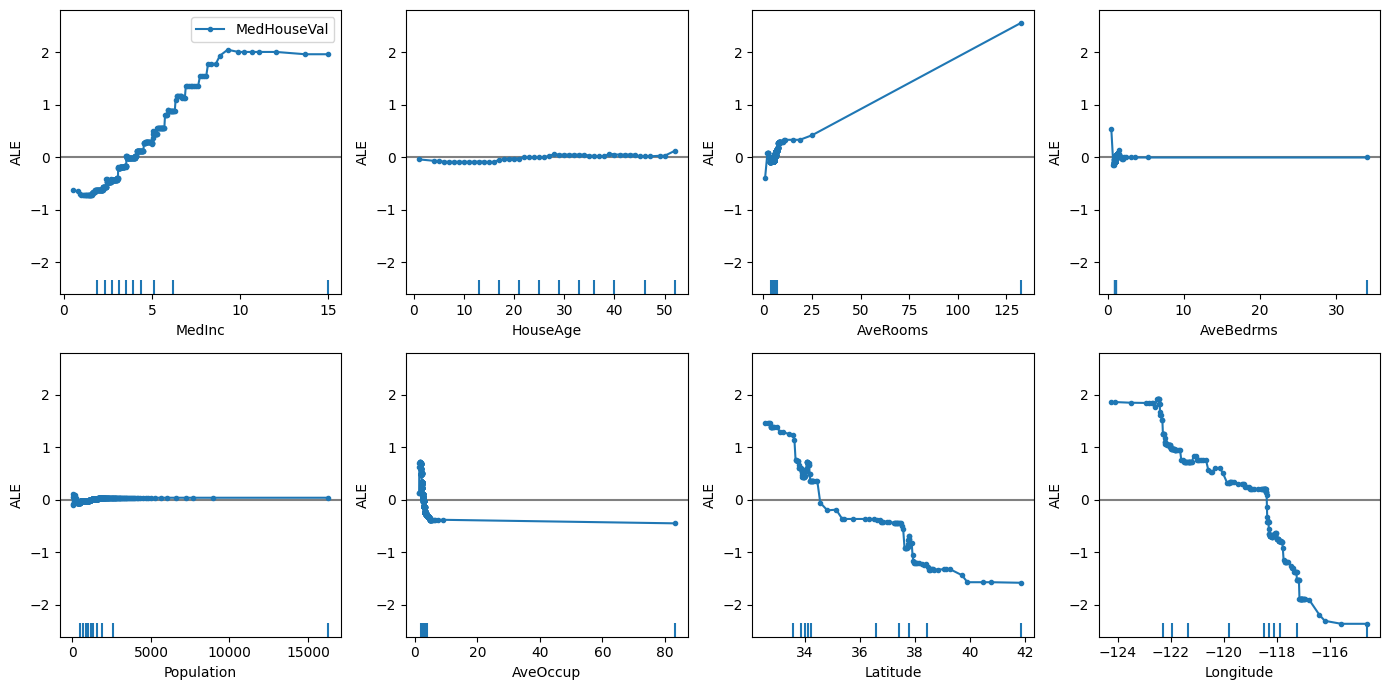

In [45]:
plot_ale(exp_xgbr, n_cols=4, fig_kw={'figwidth': 14, 'figheight': 7});

 - We can observe here, that in all eight plots, the curves manifest a non-linear, and in most cases, a non-monotonic effect, contrasting with the analysis from the previous section.